In [243]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go
import plotly.express as px
import plotly.graph_objects as go


# visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

# to split the datasets
from sklearn.model_selection import train_test_split

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer 

from sklearn.linear_model import LinearRegression

import scipy.stats as stats
from sklearn.preprocessing import KBinsDiscretizer

# the scaler - for standardisation
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

In [244]:
df = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/End of EDA/End_of_EDA_dataset.csv')
df.sample(4)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,Tvia_number,Tvia_date,y
4444,3077,73004577,Tesla,2006.0,2016-05-02,2017-05-02,300602469.0,50.0,Male,Jerusalem,0.0,3.0,NaN,NaN,0
7152,4351,73005851,Ford,2000.0,2016-11-11,2017-11-11,300607486.0,52.0,Male,Haifa,1.0,4.0,NaN,NaN,0
2295,2039,73003539,Fiat,2004.0,2016-04-08,2017-01-28,300604240.0,17.0,Male,Haifa,0.0,7.0,NaN,NaN,0
6518,4046,73005546,Ford,2011.0,2016-04-08,2016-12-07,300605411.0,47.0,Male,Tel Aviv,0.0,5.0,NaN,NaN,0


# Data Preprocessing - Feature Engineering 

### Splitting the dataset:
The calculation should be done only the train set in order to avoid overfitting

In [245]:
# let's look at the percentage of NA
df.isnull().mean()

Keypls                0.000000
Rishuy_number         0.000000
Rechecv_Companny      0.040903
Manufacture_Year      0.103550
Start_date            0.000000
End_date              0.000000
ID                    0.059709
Age                   0.059709
Gender                0.059709
City                  0.059709
Meshlem_polisa_IND    0.059709
NumInP                0.059709
Tvia_number           0.817583
Tvia_date             0.817583
y                     0.000000
dtype: float64

In [246]:
# let's separate into training and testing set
df_x = df.drop("y",1)
df_y = df['y']
X_train, X_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=0)
X_train.shape, X_test.shape

((5955, 14), (2553, 14))

In [247]:
# Let's explore the missing data in the train set
# the percentages should be fairly similar to those
# of the whole dataset
X_train.isnull().mean()

Keypls                0.000000
Rishuy_number         0.000000
Rechecv_Companny      0.041142
Manufacture_Year      0.103610
Start_date            0.000000
End_date              0.000000
ID                    0.060789
Age                   0.060789
Gender                0.060789
City                  0.060789
Meshlem_polisa_IND    0.060789
NumInP                0.060789
Tvia_number           0.814106
Tvia_date             0.814106
dtype: float64

In [248]:
abs(df.isnull().mean() - X_train.isnull().mean()) > 0.01

Age                   False
City                  False
End_date              False
Gender                False
ID                    False
Keypls                False
Manufacture_Year      False
Meshlem_polisa_IND    False
NumInP                False
Rechecv_Companny      False
Rishuy_number         False
Start_date            False
Tvia_date             False
Tvia_number           False
y                     False
dtype: bool

### Impute missing values 

Features that are not relevant: **Tvia_date, Tvia_number, Unnamed: 0, Unnamed: 0_y, Unnamed: 0_x, Meshlem_polisa_IND,ID**<br>
We left with - **City,Gender, Age, Manufacture_Year Rechecv_Companny**<br>
Continuous variables: **Manufacture_Year, Age**<br>
Categorical variables: **City, Gender, Rechecv_Companny** <br>

### Imputation of missing values - categorical: Rechecv_Companny

 Let's try to implement three methods and after that, we will select one. <br>
 We will check the dis plot before and after and then we will take the one who preserves the original dis as possible <br>
 1 - Frequent category imputation - mode  <br>
 2 - Random sample imputation  <br>
 3 - Missing category imputation  <br>

In [249]:
X_train_num1 = X_train.copy()
X_test_num1 = X_test.copy()
X_train_num2 = X_train.copy()
X_test_num2 = X_test.copy()
X_train_num3 = X_train.copy()
X_test_num3 = X_test.copy()

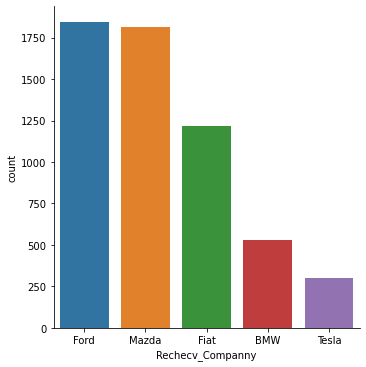

In [250]:
# 1 - Frequent category imputation - mode
# let's inspect the number of observations per category in Rechecv_Companny
sns.catplot(x="Rechecv_Companny", kind="count", data = X_train);
plt.show()

In [251]:
X_train_num1.isnull().sum()

Keypls                   0
Rishuy_number            0
Rechecv_Companny       245
Manufacture_Year       617
Start_date               0
End_date                 0
ID                     362
Age                    362
Gender                 362
City                   362
Meshlem_polisa_IND     362
NumInP                 362
Tvia_number           4848
Tvia_date             4848
dtype: int64

In [252]:
mustfreq = X_train['Rechecv_Companny'].mode()
mustfreq

0    Ford
dtype: object

In [253]:
X_train_num1['Rechecv_Companny'].fillna(X_train_num1['Rechecv_Companny'].mode()[0], inplace=True)
X_test_num1['Rechecv_Companny'].fillna(X_train_num1['Rechecv_Companny'].mode()[0], inplace=True)

In [254]:
X_train_num1['Rechecv_Companny']

1640     Ford
2237    Mazda
3222    Mazda
2578    Mazda
5893     Fiat
        ...  
4373     Fiat
7891    Mazda
4859      BMW
3264     Ford
2732    Tesla
Name: Rechecv_Companny, Length: 5955, dtype: object

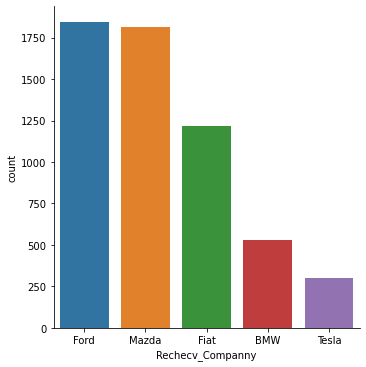

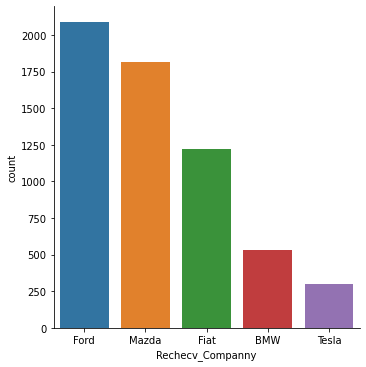

In [255]:
# Rechecv_Companny dis - method 1 plot   - Frequent category imputation - mode 
sns.catplot(x="Rechecv_Companny", kind="count", data = X_train);
sns.catplot(x="Rechecv_Companny", kind="count", data = X_train_num1);
plt.show()

In [256]:
X_train_num1.isnull().sum()

Keypls                   0
Rishuy_number            0
Rechecv_Companny         0
Manufacture_Year       617
Start_date               0
End_date                 0
ID                     362
Age                    362
Gender                 362
City                   362
Meshlem_polisa_IND     362
NumInP                 362
Tvia_number           4848
Tvia_date             4848
dtype: int64

In [257]:
# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train_num2['Rechecv_Companny_imputed'] = X_train_num2['Rechecv_Companny'].copy()
X_test_num2['Rechecv_Companny_imputed'] = X_test_num2['Rechecv_Companny'].copy()

# extract the random sample to fill the na:
random_sample_train = X_train_num2['Rechecv_Companny'].dropna().sample(X_train_num2['Rechecv_Companny'].isnull().sum(), random_state=0)
random_sample_test = X_train_num2['Rechecv_Companny'].dropna().sample(X_test_num2['Rechecv_Companny'].isnull().sum(), random_state=0)


random_sample_train.index = X_train_num2[X_train_num2['Rechecv_Companny'].isnull()].index
random_sample_test.index = X_test_num2[X_test_num2['Rechecv_Companny'].isnull()].index

# replace the NA in the newly created variable
X_train_num2.loc[X_train_num2['Rechecv_Companny'].isnull(), 'Rechecv_Companny_imputed'] = random_sample_train
X_test_num2.loc[X_test_num2['Rechecv_Companny'].isnull(), 'Rechecv_Companny_imputed'] = random_sample_test


In [258]:
# created a new variable Rechecv_Companny_imputed filled with random samplening

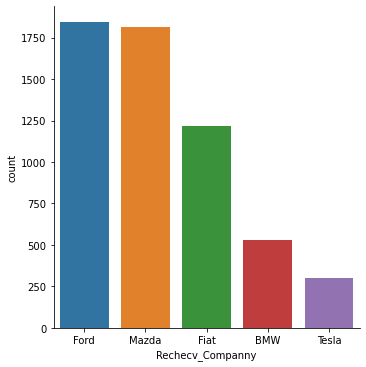

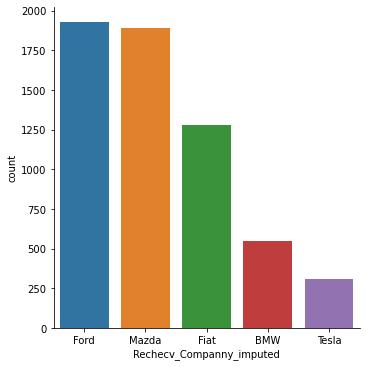

In [259]:
# Rechecv_Companny dis - method 2 plot  - Random sample imputation 
sns.catplot(x="Rechecv_Companny", kind="count", data = X_train);
sns.catplot(x="Rechecv_Companny_imputed", kind="count", data = X_train_num2);
plt.show()

In [260]:
# 3 - Missing category imputation

In [261]:
X_train_num3['Rechecv_Companny'].fillna('Missing', inplace=True)
X_test_num3['Rechecv_Companny'].fillna('Missing', inplace=True)

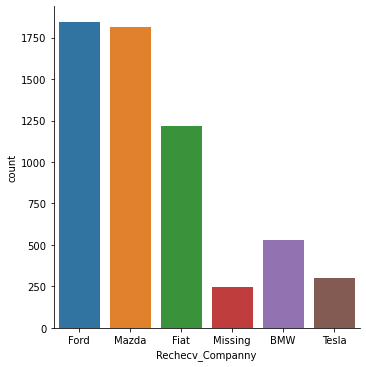

In [262]:
# Rechecv_Companny dis - method 3 plot  - Missing category imputation 
sns.catplot(x="Rechecv_Companny", kind="count", data = X_train_num3);
plt.show()

In [263]:
#X_train.head()

In [264]:
# we will keep the results of mathoud 2 and 3
X_train['Rechecv_Companny_imputed_M2'] = X_train_num2['Rechecv_Companny_imputed']
X_test['Rechecv_Companny_imputed_M2'] = X_test_num2['Rechecv_Companny_imputed']
X_train['Rechecv_Companny_Missing_M3'] = X_train_num3['Rechecv_Companny']
X_test['Rechecv_Companny_Missing_M3'] = X_test_num3['Rechecv_Companny']

In [265]:
X_train.isna().sum()

Keypls                            0
Rishuy_number                     0
Rechecv_Companny                245
Manufacture_Year                617
Start_date                        0
End_date                          0
ID                              362
Age                             362
Gender                          362
City                            362
Meshlem_polisa_IND              362
NumInP                          362
Tvia_number                    4848
Tvia_date                      4848
Rechecv_Companny_imputed_M2       0
Rechecv_Companny_Missing_M3       0
dtype: int64

In [266]:
X_train_city_plot = X_train.copy()

### Imputation of missing values - categorical: City

In [267]:
# For the practice, Let's assume that - the missing values (customers that exist only one table) are not random
# so we will try to represent the missing data and will see if we have interesting patterns

In [268]:
X_train_city_plot['City'].fillna('Missing', inplace=True)

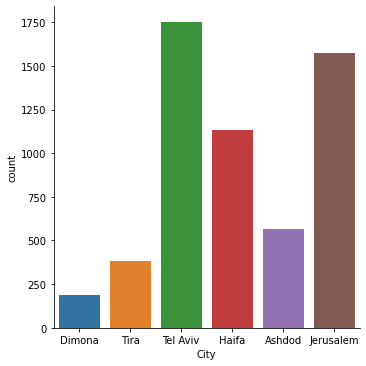

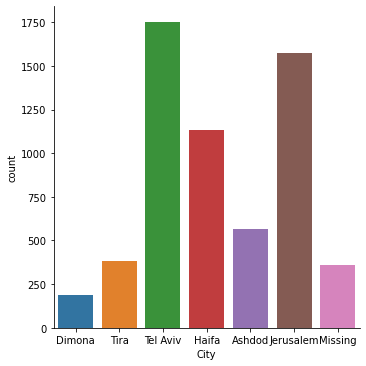

In [269]:
sns.catplot(x="City", kind="count",data = X_train);
sns.catplot(x="City", kind="count", data = X_train_city_plot);
plt.show()

In [270]:
X_train['City'].fillna('Missing', inplace=True)
X_test['City'].fillna('Missing', inplace=True)
# X_train.isna().sum()

### Imputation of missing values - categorical: Gender

In [271]:
# Because adding a new category is unlikely to reflect a real-world scenario, we will implement by random sampling

In [272]:
X_train_nu1 = X_train.copy()
X_test_nu1 = X_test.copy()

In [273]:
# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train_nu1['Gender_imputed'] = X_train['Gender'].copy()
X_test_nu1['Gender_imputed'] = X_test['Gender'].copy()

# extract the random sample to fill the na:
random_sample_train_1 = X_train_nu1['Gender'].dropna().sample(X_train_nu1['Gender'].isnull().sum(), random_state=0)
random_sample_test_1 = X_train_nu1['Gender'].dropna().sample(X_test_nu1['Gender'].isnull().sum(), random_state=0)

random_sample_train_1.index = X_train_nu1[X_train_nu1['Gender'].isnull()].index
random_sample_test_1.index = X_test_nu1[X_test_nu1['Gender'].isnull()].index
# replace the NA in the newly created variable

X_train_nu1.loc[X_train_nu1['Gender'].isnull(), 'Gender_imputed'] = random_sample_train_1
X_test_nu1.loc[X_test_num2['Gender'].isnull(), 'Gender_imputed'] = random_sample_test_1

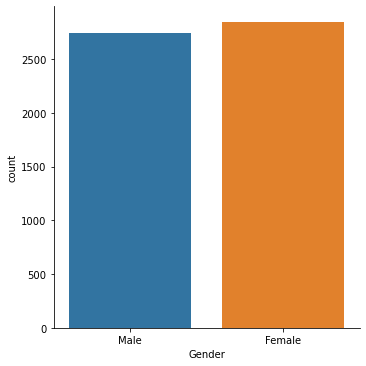

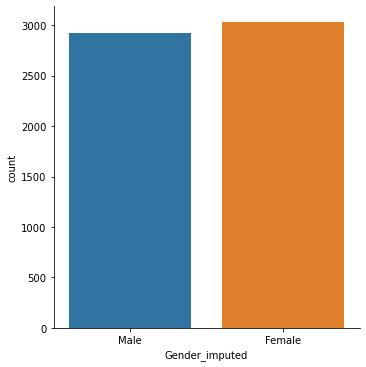

In [274]:
sns.catplot(x="Gender", kind="count", data = X_train);
sns.catplot(x="Gender_imputed", kind="count", data = X_train_nu1);
plt.show()

In [275]:
X_train['Gender_imputed'] = X_train_nu1['Gender_imputed']
X_test['Gender_imputed'] = X_test_nu1['Gender_imputed']

In [276]:
X_train.isna().sum()

Keypls                            0
Rishuy_number                     0
Rechecv_Companny                245
Manufacture_Year                617
Start_date                        0
End_date                          0
ID                              362
Age                             362
Gender                          362
City                              0
Meshlem_polisa_IND              362
NumInP                          362
Tvia_number                    4848
Tvia_date                      4848
Rechecv_Companny_imputed_M2       0
Rechecv_Companny_Missing_M3       0
Gender_imputed                    0
dtype: int64

### Imputation of missing values - continuous: Manufacture_Year

### Imputation of missing values - continuous: Age

In [277]:
# Age - for age we will try two methods 
# method one: multivariable 

In [278]:
#sns.distplot(X_train['Age'],kde=True,bins=30)

In [279]:
dfnew = X_train.select_dtypes(include=np.number)
dfnew_t = X_test.select_dtypes(include=np.number)
dfnew.corr('spearman')
#dfnew.corr()

,Keypls,Rishuy_number,Manufacture_Year,ID,Age,Meshlem_polisa_IND,NumInP,Tvia_number
Keypls,1.000000,1.000000,-0.020840,-0.004691,0.015528,0.018553,-0.029380,1.000000
Rishuy_number,1.000000,1.000000,-0.020840,-0.004691,0.015528,0.018553,-0.029380,1.000000
Manufacture_Year,-0.020840,-0.020840,1.000000,0.011406,0.033554,-0.013687,0.018038,-0.099693
ID,-0.004691,-0.004691,0.011406,1.000000,0.005148,0.463005,-0.016002,0.009572
Age,0.015528,0.015528,0.033554,0.005148,1.000000,-0.006481,-0.008471,-0.025773
Meshlem_polisa_IND,0.018553,0.018553,-0.013687,0.463005,-0.006481,1.000000,-0.449108,0.026799
NumInP,-0.029380,-0.029380,0.018038,-0.016002,-0.008471,-0.449108,1.000000,-0.064556
Tvia_number,1.000000,1.000000,-0.099693,0.009572,-0.025773,0.026799,-0.064556,1.000000


In [280]:
cor_df = dfnew[['Age','Manufacture_Year','Rishuy_number']]
cor_df_t = dfnew_t[['Age','Manufacture_Year','Rishuy_number']]
cor_df.sample(3)

,Age,Manufacture_Year,Rishuy_number
5206,72.0,2002.0,73004927
7799,69.0,NaN,73006171
4290,56.0,2000.0,73004500


In [281]:
cor_df.isna().sum()

Age                 362
Manufacture_Year    617
Rishuy_number         0
dtype: int64

In [282]:
imp = KNNImputer(n_neighbors =2)
imp.fit(cor_df_t)
imputed_df_t = imp.transform(cor_df_t)
imputed_df_t = pd.DataFrame(imputed_df_t, columns=cor_df_t.columns)
imputed_df_t.shape

(2553, 3)

In [283]:
imp = KNNImputer(n_neighbors =2)
imp.fit(cor_df)
imputed_df = imp.transform(cor_df)
imputed_df = pd.DataFrame(imputed_df, columns=cor_df.columns)

In [285]:
# to copy the new age column - we need to fit the indexs
indexx = X_train['Age'].index
type(indexx)
indexx = indexx.to_frame(name= "x")
indexx['x']

indexx_test = X_test['Age'].index
indexx_test = indexx_test.to_frame(name= "x_t")
#indexx_test['x_t']
indexx_test.shape

(2553, 1)

In [287]:
imputed_df = imputed_df.set_index(indexx['x'])
imputed_df_t = imputed_df_t.set_index(indexx_test['x_t'])

<AxesSubplot:ylabel='Density'>

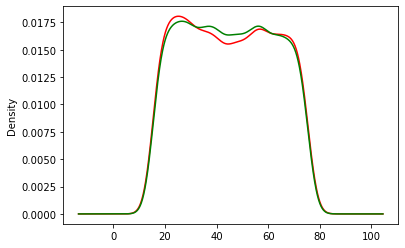

In [290]:
# let's check the distribution with na and with knn impliment
X_train['Age'].plot(kind='kde', color='red')
imputed_df['Age'].plot(kind='kde', color='green')

In [ ]:
# we dont have big diffrence between the dis
# now we copy the age by knn to our dataset as age_knn

In [86]:
#imputed_df_t['Age']

x_t
6918    72.0
882     54.0
7136    69.0
528     66.0
7525    63.0
        ... 
7945    24.0
219     57.0
5007    61.0
195     47.0
6126    51.0
Name: Age, Length: 2553, dtype: float64

In [87]:
#X_test['Age']

6918    72.0
882     54.0
7136    69.0
528     66.0
7525    63.0
        ... 
7945    24.0
219     57.0
5007    61.0
195     47.0
6126    51.0
Name: Age, Length: 2553, dtype: float64

In [291]:
X_train['Age_knn'] = imputed_df['Age']
X_test['Age_knn'] = imputed_df_t['Age']
X_test.sample(3)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Start_date,End_date,ID,Age,Gender,City,Meshlem_polisa_IND,NumInP,Tvia_number,Tvia_date,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed,Age_knn
4665,3185,73004685,Mazda,2004.0,2016-09-03,2017-09-03,300602180.0,38.0,Male,Tel Aviv,0.0,3.0,NaN,NaN,Mazda,Mazda,Male,38.0
6809,4196,73005696,Ford,2009.0,2016-05-02,2017-02-21,300606970.0,18.0,Male,Haifa,1.0,2.0,NaN,NaN,Ford,Ford,Male,18.0
5152,3403,73004903,BMW,2002.0,2016-11-11,2017-11-11,300605562.0,64.0,Female,Tel Aviv,0.0,4.0,5774409.0,2017-05-05,BMW,BMW,Female,64.0


In [292]:
X_train.isna().sum()

Keypls                            0
Rishuy_number                     0
Rechecv_Companny                245
Manufacture_Year                617
Start_date                        0
End_date                          0
ID                              362
Age                             362
Gender                          362
City                              0
Meshlem_polisa_IND              362
NumInP                          362
Tvia_number                    4848
Tvia_date                      4848
Rechecv_Companny_imputed_M2       0
Rechecv_Companny_Missing_M3       0
Gender_imputed                    0
Age_knn                           0
dtype: int64

### Imputation of missing values - continuous: Manufacture_Year 

In [91]:
X_train_nu2 = X_train.copy()
X_test_nu2 = X_test.copy()

In [293]:
# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train_nu2['Manufacture_Year_imputed'] = X_train['Manufacture_Year'].copy()
X_test_nu2['Manufacture_Year_imputed'] = X_test['Manufacture_Year'].copy()
# extract the random sample to fill the na:

random_sample_train_2 = X_train_nu2['Manufacture_Year'].dropna().sample(X_train_nu2['Manufacture_Year'].isnull().sum(), random_state=0)
random_sample_test_2 = X_train_nu2['Manufacture_Year'].dropna().sample(X_test_nu2['Manufacture_Year'].isnull().sum(), random_state=0)

random_sample_train_2.index = X_train_nu2[X_train_nu2['Manufacture_Year'].isnull()].index
random_sample_test_2.index = X_test_nu2[X_test_nu1['Manufacture_Year'].isnull()].index

# replace the NA in the newly created variable
X_train_nu2.loc[X_train_nu2['Manufacture_Year'].isnull(), 'Manufacture_Year_imputed'] = random_sample_train_2
X_test_nu2.loc[X_test_nu2['Manufacture_Year'].isnull(), 'Manufacture_Year_imputed'] = random_sample_test_2


In [295]:
#X_train_nu2.isna().sum()

<AxesSubplot:ylabel='Density'>

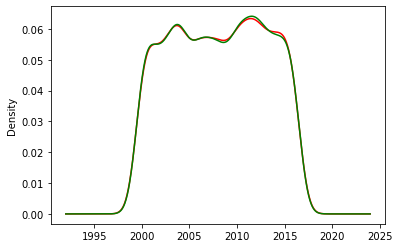

In [296]:
X_train['Manufacture_Year'].plot(kind='kde', color='red')
X_train_nu2['Manufacture_Year_imputed'].plot(kind='kde', color='green')

In [96]:
X_train['Manufacture_Year_imputed'] = X_train_nu2['Manufacture_Year_imputed']
X_test['Manufacture_Year_imputed'] = X_test_nu2['Manufacture_Year_imputed']

In [97]:
X_train.isna().sum()

Keypls                            0
Rishuy_number                     0
Rechecv_Companny                245
Manufacture_Year                617
Start_date                        0
End_date                          0
ID                              362
Age                             362
Gender                          362
City                              0
Meshlem_polisa_IND              362
NumInP                          362
Tvia_number                    4848
Tvia_date                      4848
Rechecv_Companny_imputed_M2       0
Rechecv_Companny_Missing_M3       0
Gender_imputed                    0
Age_knn                           0
Manufacture_Year_imputed          0
dtype: int64

In [338]:
# X_train.to_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_X_train_after_miising.csv', index = False)
# X_test.to_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_X_test_after_miising.csv', index = False)
# y_train.to_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_y_train_after_miising.csv', index = False)
# y_test.to_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_y_test_after_miising.csv', index = False)

X_train = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_X_train_after_miising.csv')
X_test = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_X_test_after_miising.csv')
y_train = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_y_train_after_miising.csv')
y_test = pd.read_csv(r'/Users/roni/Google Drive/DS-ML Project 2021/datasets/temp/after_miss/insurance_y_test_after_miising.csv')

### Categorical Variable Encoding 

In [339]:
# before encoding - let's remove unused variables 

In [340]:
X_train.isna().sum()

Keypls                            0
Rishuy_number                     0
Rechecv_Companny                245
Manufacture_Year                617
Start_date                        0
End_date                          0
ID                              362
Age                             362
Gender                          362
City                              0
Meshlem_polisa_IND              362
NumInP                          362
Tvia_number                    4848
Tvia_date                      4848
Rechecv_Companny_imputed_M2       0
Rechecv_Companny_Missing_M3       0
Gender_imputed                    0
Age_knn                           0
dtype: int64

In [341]:
X_train = X_train.drop(['ID','Meshlem_polisa_IND','Tvia_number','Tvia_date','Start_date','End_date'], axis=1)
X_test = X_test.drop(['ID','Meshlem_polisa_IND','Tvia_number','Tvia_date','Start_date','End_date'], axis=1)
X_train.isna().sum()

Keypls                           0
Rishuy_number                    0
Rechecv_Companny               245
Manufacture_Year               617
Age                            362
Gender                         362
City                             0
NumInP                         362
Rechecv_Companny_imputed_M2      0
Rechecv_Companny_Missing_M3      0
Gender_imputed                   0
Age_knn                          0
dtype: int64

In [342]:
# Describe only nun-numeric fetures 
X_train_cat = X_train.describe(include=['O'])
X_train_cat

,Rechecv_Companny,Gender,City,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed
count,5710,5593,5955,5955,5955,5955
unique,5,2,7,5,6,2
top,Ford,Female,Tel Aviv,Ford,Ford,Female
freq,1845,2849,1753,1929,1845,3034


In [343]:
# let's have a look at how many labels each variable has
for col in X_train_cat.columns:
 print(col, ':', len(X_train_cat[col].unique()), 'labels')

Rechecv_Companny : 4 labels
Gender : 4 labels
City : 4 labels
Rechecv_Companny_imputed_M2 : 4 labels
Rechecv_Companny_Missing_M3 : 4 labels
Gender_imputed : 4 labels


In [344]:
X_train.groupby("Gender").size()

Gender
Female    2849
Male      2744
dtype: int64

In [345]:
X_train['Rechecv_Companny'].unique()

array(['Ford', 'Mazda', 'Fiat', nan, 'BMW', 'Tesla'], dtype=object)

In [346]:
X_train['Rechecv_Companny_Missing_M3'].unique()

array(['Ford', 'Mazda', 'Fiat', 'Missing', 'BMW', 'Tesla'], dtype=object)

In [347]:
X_train['City'].unique()

array(['Dimona', 'Tira', 'Tel Aviv', 'Haifa', 'Ashdod', 'Jerusalem',
       'Missing'], dtype=object)

### Gender - one hot encoding

In [349]:
# we can create dummy variables with the build in 
# pandas method get_dummies 
tmp = pd.get_dummies(X_train['Gender']) 
tmp.head()

,Female,Male
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


In [350]:
# for better visualisation let's put the dummies next to the original variable 
pd.concat([X_train['Gender'], pd.get_dummies(X_train['Gender'])],axis = 1).head()

,Gender,Female,Male
0,Male,0,1
1,Male,0,1
2,Female,1,0
3,Male,0,1
4,Female,1,0


In [351]:
X_train = pd.concat([X_train,pd.get_dummies(X_train['Gender'])],axis =1 )
X_test = pd.concat([ X_test , pd.get_dummies(X_train[ 'Gender' ])], axis = 1 ) # x_test by -- x_train
X_train.head()

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed,Age_knn,Female,Male
0,1734,73003234,Ford,2003.0,17.0,Male,Dimona,3.0,Ford,Ford,Male,17.0,0,1
1,2017,73003517,Mazda,2011.0,60.0,Male,Tira,5.0,Mazda,Mazda,Male,60.0,0,1
2,2478,73003978,Mazda,2013.0,75.0,Female,Tel Aviv,2.0,Mazda,Mazda,Female,75.0,1,0
3,2170,73003670,Mazda,2010.0,27.0,Male,Tel Aviv,3.0,Mazda,Mazda,Male,27.0,0,1
4,3748,73005248,Fiat,2013.0,70.0,Female,Haifa,3.0,Fiat,Fiat,Female,70.0,1,0


### Rechecv_Companny - Target encodings

### Method 1: Target guided encodings

In [353]:
X_train_cat.columns

Index(['Rechecv_Companny', 'Gender', 'City', 'Rechecv_Companny_imputed_M2',
       'Rechecv_Companny_Missing_M3', 'Gender_imputed'],
      dtype='object')

In [354]:
X_train_wy = X_train.copy()
X_test_wy = X_test.copy()
X_train_wy['y'] = y_train['y'].copy()
X_test_wy['y'] = y_test['y'].copy()
X_train_wy.head(3)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed,Age_knn,Female,Male,y
0,1734,73003234,Ford,2003.0,17.0,Male,Dimona,3.0,Ford,Ford,Male,17.0,0,1,0
1,2017,73003517,Mazda,2011.0,60.0,Male,Tira,5.0,Mazda,Mazda,Male,60.0,0,1,0
2,2478,73003978,Mazda,2013.0,75.0,Female,Tel Aviv,2.0,Mazda,Mazda,Female,75.0,1,0,0


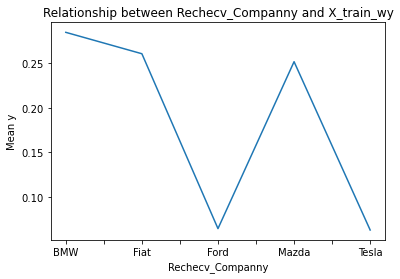

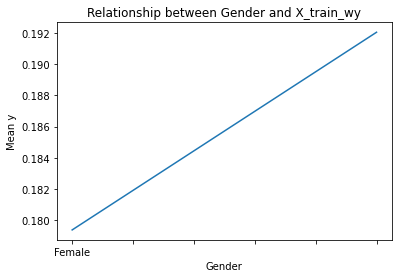

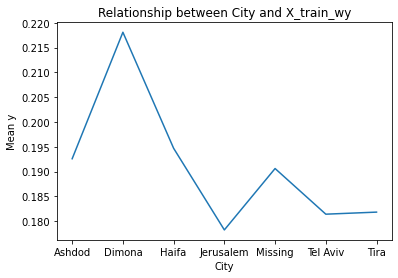

In [355]:
# let's explore the relationship of the categories with the target
for var in ['Rechecv_Companny', 'Gender', 'City']:
    fig = plt.figure()
    fig = X_train_wy.groupby([var])['y'].mean().plot()
    fig.set_title('Relationship between {} and X_train_wy'.format(var))
    fig.set_ylabel('Mean y')
    plt.show()

In [356]:
# let's order the labels according to the mean target value
X_train_wy.groupby(X_train_wy['City'])['y'].mean().sort_values()

City
Jerusalem    0.178230
Tel Aviv     0.181403
Tira         0.181818
Missing      0.190608
Ashdod       0.192580
Haifa        0.194690
Dimona       0.218085
Name: y, dtype: float64

In [357]:
# first we generate an ordered list with the labels
ordered_labels = X_train_wy.groupby(['City'])['y'].mean().sort_values().index
ordered_labels

Index(['Jerusalem', 'Tel Aviv', 'Tira', 'Missing', 'Ashdod', 'Haifa',
       'Dimona'],
      dtype='object', name='City')

In [358]:
# next let's create a dictionary with the mappings of categories to numbers
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'Jerusalem': 0,
 'Tel Aviv': 1,
 'Tira': 2,
 'Missing': 3,
 'Ashdod': 4,
 'Haifa': 5,
 'Dimona': 6}

In [359]:
# now, we replace the labels with the integers
X_train['City_orencod_mean'] = X_train_wy['City'].map(ordinal_mapping)
X_test['City_orencod_mean'] = X_test_wy['City'].map(ordinal_mapping)

In [128]:
#we created monotonic relathenship between city to y 

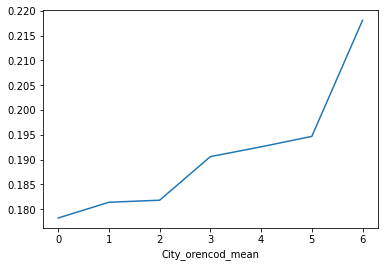

In [366]:
fig = X_train_wy.groupby(X_train['City_orencod_mean'])['y'].mean().plot()

### Method 2: Mean-Encoding

In [131]:
# let's order the labels according to the mean target value
X_train_wy.groupby(X_train_wy['City'])['y'].mean().sort_values()

City
Jerusalem    0.178230
Tel Aviv     0.181403
Tira         0.181818
Missing      0.190608
Ashdod       0.192580
Haifa        0.194690
Dimona       0.218085
Name: y, dtype: float64

In [368]:
# and now let's do the same but capturing the result in a dictionary
ordered_labels = X_train_wy.groupby(['City'])['y'].mean().to_dict()
ordered_labels

{'Ashdod': 0.19257950530035337,
 'Dimona': 0.21808510638297873,
 'Haifa': 0.19469026548672566,
 'Jerusalem': 0.17823042647994908,
 'Missing': 0.19060773480662985,
 'Tel Aviv': 0.1814033086138049,
 'Tira': 0.18181818181818182}

In [369]:
# now, we replace the labels with the target means
X_train['City_by_mean'] = X_train_wy['City'].map(ordered_labels)
X_test['City_by_mean'] = X_test_wy['City'].map(ordered_labels)

In [371]:
X_train.head(4)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed,Age_knn,Female,Male,City_orencod_mean,City_by_mean
0,1734,73003234,Ford,2003.0,17.0,Male,Dimona,3.0,Ford,Ford,Male,17.0,0,1,6,0.218085
1,2017,73003517,Mazda,2011.0,60.0,Male,Tira,5.0,Mazda,Mazda,Male,60.0,0,1,2,0.181818
2,2478,73003978,Mazda,2013.0,75.0,Female,Tel Aviv,2.0,Mazda,Mazda,Female,75.0,1,0,1,0.181403
3,2170,73003670,Mazda,2010.0,27.0,Male,Tel Aviv,3.0,Mazda,Mazda,Male,27.0,0,1,1,0.181403


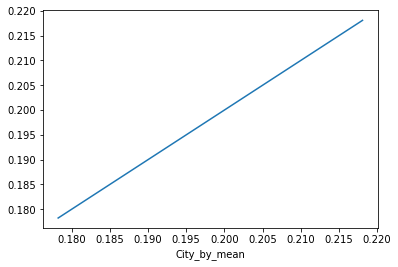

In [372]:
fig = X_train_wy.groupby(X_train['City_by_mean'])['y'].mean().plot()

### Method 3:  Probability-Ratio-Encoding 

In [137]:
# let's calculate the probability of claim = 1 per category
prob_df = X_train_wy.groupby(['City'])['y'].mean()
prob_df = pd.DataFrame(prob_df)
prob_df

,y
City,
Ashdod,0.192580
Dimona,0.218085
Haifa,0.194690
Jerusalem,0.178230
Missing,0.190608
Tel Aviv,0.181403
Tira,0.181818


In [138]:
# and now the probability of claim = 0
prob_df['not_y'] = 1 - prob_df['y']
prob_df

,y,not_y
City,,
Ashdod,0.192580,0.807420
Dimona,0.218085,0.781915
Haifa,0.194690,0.805310
Jerusalem,0.178230,0.821770
Missing,0.190608,0.809392
Tel Aviv,0.181403,0.818597
Tira,0.181818,0.818182


In [139]:
# and now the ratio
prob_df['ratio'] = prob_df['y'] / prob_df['not_y']
prob_df

,y,not_y,ratio
City,,,
Ashdod,0.192580,0.807420,0.238512
Dimona,0.218085,0.781915,0.278912
Haifa,0.194690,0.805310,0.241758
Jerusalem,0.178230,0.821770,0.216886
Missing,0.190608,0.809392,0.235495
Tel Aviv,0.181403,0.818597,0.221603
Tira,0.181818,0.818182,0.222222


In [140]:
# and now let's capture the ratio in a dictionary
ordered_labels = prob_df['ratio'].to_dict()
ordered_labels

{'Ashdod': 0.23851203501094095,
 'Dimona': 0.27891156462585037,
 'Haifa': 0.24175824175824173,
 'Jerusalem': 0.21688613477924087,
 'Missing': 0.2354948805460751,
 'Tel Aviv': 0.22160278745644602,
 'Tira': 0.22222222222222224}

In [374]:
# now, we replace the labels with the ratios
X_train['City_prob'] = X_train_wy['City'].map(ordered_labels)
X_test['City_prob'] = X_test_wy['City'].map(ordered_labels)

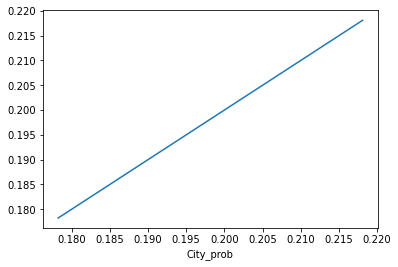

In [375]:
# let's explore the result
fig = X_train_wy.groupby(X_train['City_prob'])['y'].mean().plot()

In [377]:
## Rechecv_Companny - we will encode this variable by the mean method 
X_train_wy.sample(4)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed,Age_knn,Female,Male,y
5035,2112,73003612,Fiat,2006.0,60.0,Female,Tel Aviv,2.0,Fiat,Fiat,Female,60.0,1,0,0
5467,1369,73002869,Ford,2016.0,46.0,Male,Tel Aviv,3.0,Ford,Ford,Male,46.0,0,1,0
3938,3694,73005194,Ford,NaN,NaN,NaN,Missing,NaN,Ford,Ford,Female,63.5,0,0,1
1782,3122,73004622,BMW,2011.0,57.0,Female,Jerusalem,6.0,BMW,BMW,Female,57.0,1,0,0


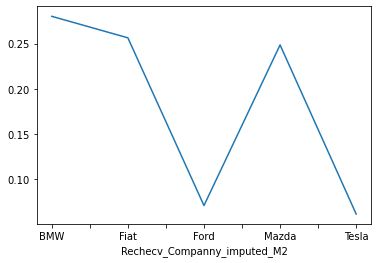

In [378]:
fig = X_train_wy.groupby(X_train['Rechecv_Companny_imputed_M2'])['y'].mean().plot()

In [379]:
# let's order the labels according to the mean target value
X_train_wy.groupby(X_train_wy['Rechecv_Companny_Missing_M3'])['y'].mean().sort_values()

Rechecv_Companny_Missing_M3
Tesla      0.062914
Ford       0.064499
Missing    0.175510
Mazda      0.251929
Fiat       0.260870
BMW        0.284906
Name: y, dtype: float64

In [146]:
X_train_wy.groupby(X_train_wy['Rechecv_Companny_imputed_M2'])['y'].mean().sort_values()

Rechecv_Companny_imputed_M2
Tesla    0.061688
Ford     0.071021
Mazda    0.248414
Fiat     0.256270
BMW      0.280000
Name: y, dtype: float64

In [380]:
# and now let's do the same but capturing the result in a dictionary
ordered_labels_m3 = X_train_wy.groupby(['Rechecv_Companny_Missing_M3'])['y'].mean().to_dict()
ordered_labels_m3

{'BMW': 0.2849056603773585,
 'Fiat': 0.2608695652173913,
 'Ford': 0.06449864498644986,
 'Mazda': 0.2519294377067255,
 'Missing': 0.17551020408163265,
 'Tesla': 0.06291390728476821}

In [381]:
# and now let's do the same but capturing the result in a dictionary
ordered_labels = X_train_wy.groupby(['Rechecv_Companny_imputed_M2'])['y'].mean().to_dict()
ordered_labels

{'BMW': 0.28,
 'Fiat': 0.256269592476489,
 'Ford': 0.07102125453602903,
 'Mazda': 0.24841437632135308,
 'Tesla': 0.06168831168831169}

In [382]:
# now, we replace the labels with the target means
X_train['Rechecv_Companny_Missing_M3_en_mean'] = X_train_wy['Rechecv_Companny_Missing_M3'].map(ordered_labels_m3)
X_test['Rechecv_Companny_Missing_M3_en_mean'] = X_test_wy['Rechecv_Companny_Missing_M3'].map(ordered_labels_m3)
X_train['Rechecv_Companny_Missing_M2_en_mean'] = X_train_wy['Rechecv_Companny_imputed_M2'].map(ordered_labels)
X_test['Rechecv_Companny_Missing_M2_en_mean'] = X_test_wy['Rechecv_Companny_imputed_M2'].map(ordered_labels)

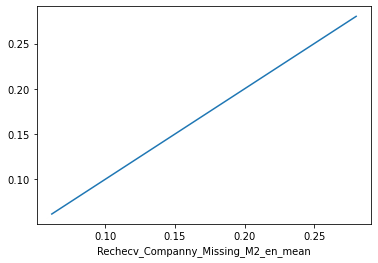

In [383]:
fig = X_train_wy.groupby(X_train['Rechecv_Companny_Missing_M2_en_mean'])['y'].mean().plot()

In [384]:
X_train.sample(3)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,Gender_imputed,Age_knn,Female,Male,City_orencod_mean,City_by_mean,City_prob,Rechecv_Companny_Missing_M3_en_mean,Rechecv_Companny_Missing_M2_en_mean
3603,2378,73003878,BMW,2007.0,NaN,NaN,Missing,NaN,BMW,BMW,Female,63.0,0,0,3,0.190608,0.190608,0.284906,0.280000
3380,4939,73006439,BMW,2012.0,23.0,Male,Ashdod,2.0,BMW,BMW,Male,23.0,0,1,4,0.192580,0.192580,0.284906,0.280000
2394,2299,73003799,Ford,NaN,61.0,Female,Tel Aviv,2.0,Ford,Ford,Female,61.0,1,0,1,0.181403,0.181403,0.064499,0.071021


## Transformations 

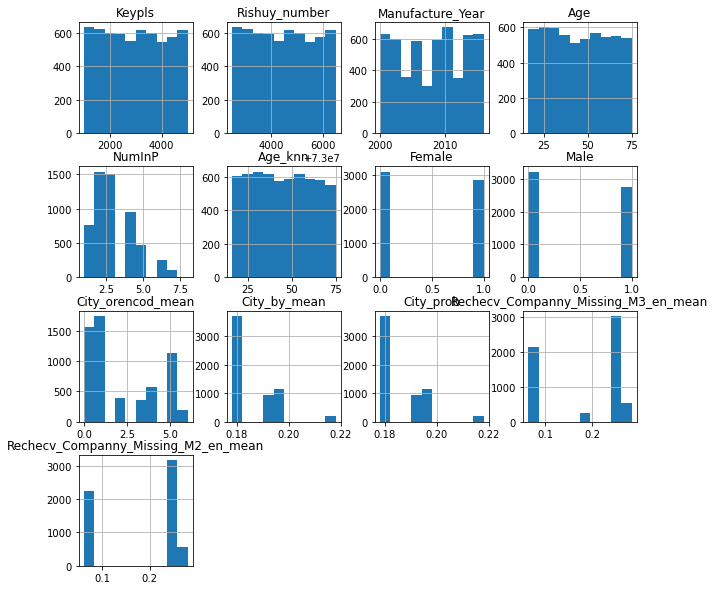

In [385]:
# let's explore the distribution of the numerical variables
X_train.hist(figsize=(10,10))
plt.show()

In [386]:
# plot the histograms to have a quick look at the variable distribution
# histogram and Q-Q plots
def diagnostic_plots(df, variable):
# function to plot a histogram and a Q-Q plot
# side by side, for a certain variable
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

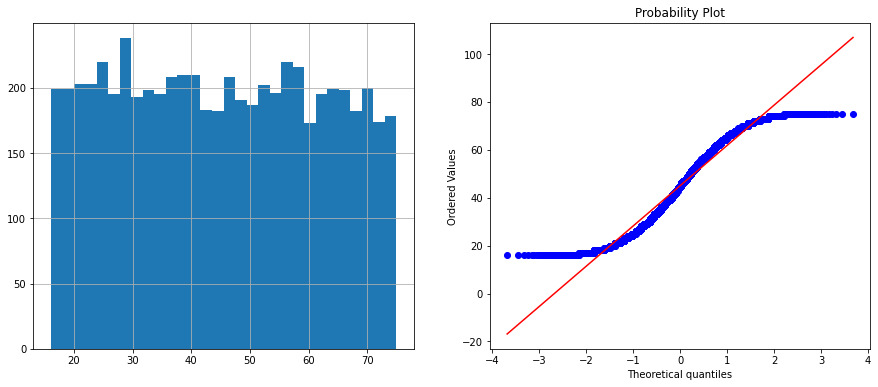

In [387]:
diagnostic_plots(X_train, 'Age_knn')

In [388]:
## method 1 -  Logarithmic transformation 

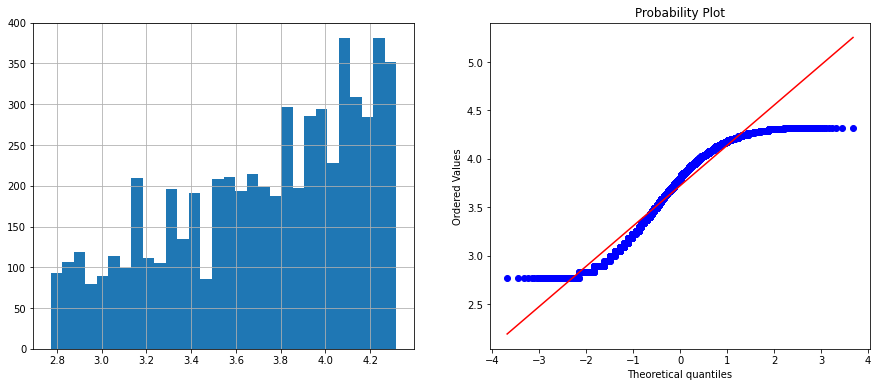

In [390]:
X_train['Age_knn_log'] = np.log(X_train['Age_knn'])
X_test['Age_knn_log'] = np.log(X_test['Age_knn'])

diagnostic_plots(X_train, 'Age_knn_log')
#diagnostic_plots(X_test, 'Age_knn_log')

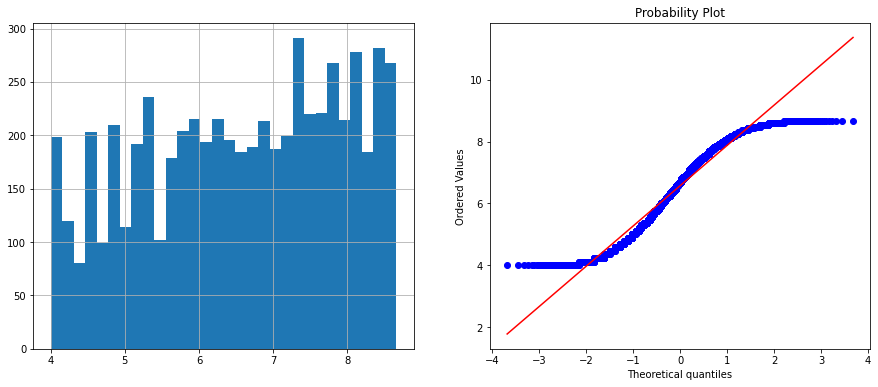

In [391]:
## method 2 -  sqr transformation 
X_train['Age_knn_sqr'] = X_train['Age_knn']**(1/2)
X_test['Age_knn_sqr'] = X_test['Age_knn']**(1/2)

diagnostic_plots(X_train, 'Age_knn_sqr')

In [ ]:
## Box-Cox transformation

Optimal :  8.472135811722177


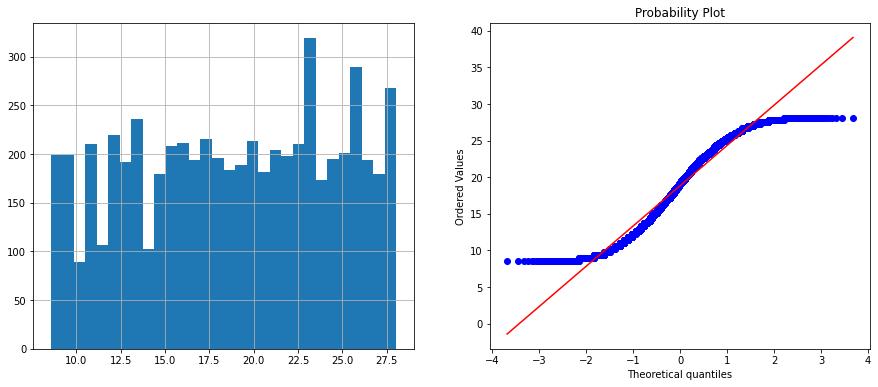

In [392]:
X_train['Age_knn_boxcox'], param = stats.boxcox(X_train['Age_knn'])
X_test['Age_knn_boxcox'], param = stats.boxcox(X_test['Age_knn'])
print('Optimal : ', param)
diagnostic_plots(X_train, 'Age_knn_boxcox')

In [ ]:
#X_train.sample()

## Discretisation:  

In [159]:
# age - discretisation 

In [395]:
# let's use pandas qcut (quantile cut) ,let's create 10 bins.
Age_disccretised, intervals = pd.qcut(X_train['Age'], 10, labels=None, retbins=True, precision=3,duplicates='raise')
pd.concat([Age_disccretised, X_train['Age']], axis=1).head(10)

,Age,Age
0,"(15.999, 21.0]",17.0
1,"(57.0, 63.0]",60.0
2,"(69.0, 75.0]",75.0
3,"(21.0, 27.0]",27.0
4,"(69.0, 75.0]",70.0
5,"(63.0, 69.0]",69.0
6,"(38.0, 45.0]",44.0
7,"(27.0, 32.0]",29.0
8,"(21.0, 27.0]",26.0
9,"(69.0, 75.0]",72.0


In [396]:
intervals

array([16., 21., 27., 32., 38., 45., 51., 57., 63., 69., 75.])

In [397]:
# we will get roughly the same number of passengers per interval
Age_disccretised.value_counts().sort_index()

(15.999, 21.0]    593
(21.0, 27.0]      599
(27.0, 32.0]      487
(32.0, 38.0]      567
(38.0, 45.0]      608
(45.0, 51.0]      533
(51.0, 57.0]      569
(57.0, 63.0]      546
(63.0, 69.0]      549
(69.0, 75.0]      542
Name: Age, dtype: int64

In [398]:
# we can also add labels instead of having the interval boundaries, to the bins, as follows:
labels = ['Q'+str(i) for i in range(1,11)]
labels

['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10']

In [399]:
X_train['Age_disc_label'] , intervals = pd.qcut(X_train['Age'], 10, labels=labels ,retbins=True ,precision=3, duplicates='raise')
X_train

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,...,Male,City_orencod_mean,City_by_mean,City_prob,Rechecv_Companny_Missing_M3_en_mean,Rechecv_Companny_Missing_M2_en_mean,Age_knn_log,Age_knn_sqr,Age_knn_boxcox,Age_disc_label
0,1734,73003234,Ford,2003.0,17.0,Male,Dimona,3.0,Ford,Ford,...,1,6,0.218085,0.218085,0.064499,0.071021,2.833213,4.123106,8.977393,Q1
1,2017,73003517,Mazda,2011.0,60.0,Male,Tira,5.0,Mazda,Mazda,...,1,2,0.181818,0.181818,0.251929,0.248414,4.094345,7.745967,23.773532,Q8
2,2478,73003978,Mazda,2013.0,75.0,Female,Tel Aviv,2.0,Mazda,Mazda,...,0,1,0.181403,0.181403,0.251929,0.248414,4.317488,8.660254,28.043761,Q10
3,2170,73003670,Mazda,2010.0,27.0,Male,Tel Aviv,3.0,Mazda,Mazda,...,1,1,0.181403,0.181403,0.251929,0.248414,3.295837,5.196152,12.965860,Q2
4,3748,73005248,Fiat,2013.0,70.0,Female,Haifa,3.0,Fiat,Fiat,...,0,5,0.194690,0.194690,0.260870,0.256270,4.248495,8.366600,26.651397,Q10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5950,3040,73004540,Fiat,2012.0,44.0,Female,Tel Aviv,2.0,Fiat,Fiat,...,0,1,0.181403,0.181403,0.260870,0.256270,3.784190,6.633250,18.846129,Q5
5951,4709,73006209,Mazda,2011.0,56.0,Female,Jerusalem,2.0,Mazda,Mazda,...,0,0,0.178230,0.178230,0.251929,0.248414,4.025352,7.483315,22.582928,Q7
5952,3269,73004769,BMW,2009.0,71.0,Female,Tel Aviv,3.0,BMW,BMW,...,0,1,0.181403,0.181403,0.284906,0.280000,4.262680,8.426150,26.932184,Q10
5953,2494,73003994,NaN,2016.0,50.0,Female,Tira,6.0,Fiat,Missing,...,0,2,0.181818,0.181818,0.175510,0.256270,3.912023,7.071068,20.748077,Q6


In [400]:
X_test['Age_disc_label'] = pd.cut(x = X_test['Age'], bins=intervals,labels=labels)
X_test.head(10)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,...,Male,City_orencod_mean,City_by_mean,City_prob,Rechecv_Companny_Missing_M3_en_mean,Rechecv_Companny_Missing_M2_en_mean,Age_knn_log,Age_knn_sqr,Age_knn_boxcox,Age_disc_label
0,4248.0,73005748.0,Ford,2000.0,72.0,Male,Tel Aviv,2.0,Ford,Ford,...,1,1.0,0.181403,0.181403,0.064499,0.071021,4.276666,8.485281,6.420669e+14,Q10
1,1386.0,73002886.0,Mazda,2012.0,54.0,Female,Jerusalem,6.0,Mazda,Mazda,...,1,0.0,0.178230,0.178230,0.251929,0.248414,3.988984,7.348469,5.611543e+13,Q7
2,4345.0,73005845.0,Mazda,2016.0,69.0,Male,Tira,1.0,Mazda,Mazda,...,0,2.0,0.181818,0.181818,0.251929,0.248414,4.234107,8.306624,4.476992e+14,Q9
3,1231.0,73002731.0,BMW,2013.0,66.0,Male,Tel Aviv,2.0,BMW,BMW,...,1,1.0,0.181403,0.181403,0.284906,0.280000,4.189655,8.124038,3.072065e+14,Q9
4,4534.0,73006034.0,Ford,2004.0,63.0,Male,Haifa,2.0,Ford,Ford,...,0,5.0,0.194690,0.194690,0.064499,0.071021,4.143135,7.937254,2.071403e+14,Q8
5,2526.0,73004026.0,Fiat,2016.0,41.0,Male,Haifa,3.0,Fiat,Fiat,...,1,5.0,0.194690,0.194690,0.260870,0.256270,3.713572,6.403124,5.441654e+12,Q5
6,4834.0,73006334.0,Mazda,2006.0,45.0,Female,Ashdod,1.0,Mazda,Mazda,...,0,4.0,0.192580,0.192580,0.251929,0.248414,3.806662,6.708204,1.197424e+13,Q5
7,3026.0,73004526.0,NaN,2000.0,26.0,Female,Tel Aviv,1.0,Ford,Missing,...,0,1.0,0.181403,0.181403,0.175510,0.071021,3.258097,5.099020,1.147766e+11,Q2
8,3409.0,73004909.0,Fiat,2016.0,20.0,Male,Jerusalem,3.0,Fiat,Fiat,...,0,0.0,0.178230,0.178230,0.260870,0.256270,2.995732,4.472136,1.243111e+10,Q1
9,4265.0,73005765.0,Fiat,2004.0,34.0,Female,Tira,1.0,Fiat,Fiat,...,1,2.0,0.181818,0.181818,0.260870,0.256270,3.526361,5.830952,1.114049e+12,Q4


In [401]:
# untiil here we craete the bins for test and train sets and now all we need is to encode the values in the bins to numbers 

<AxesSubplot:xlabel='Age_disc_label'>

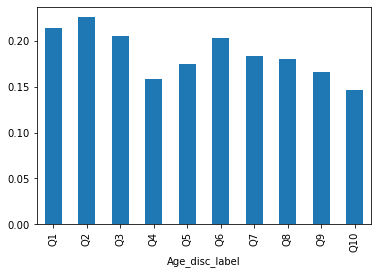

In [403]:
X_train_wy.groupby(X_train['Age_disc_label'])['y'].mean().plot.bar()

<AxesSubplot:xlabel='Age_disc_label'>

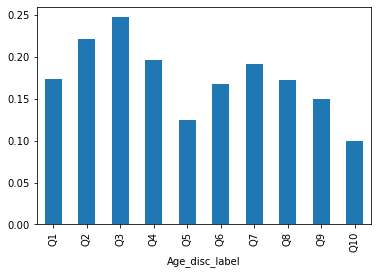

In [404]:
X_test_wy.groupby(X_test['Age_disc_label'])['y'].mean().plot.bar()

In [405]:
# let's order the labels according to the mean target value
X_train_wy.groupby(X_train['Age_disc_label'])['y'].mean().sort_values()

Age_disc_label
Q10    0.145756
Q4     0.158730
Q9     0.165756
Q5     0.174342
Q8     0.179487
Q7     0.182777
Q6     0.202627
Q3     0.205339
Q1     0.214165
Q2     0.225376
Name: y, dtype: float64

In [406]:
X_test_wy.groupby(X_test['Age_disc_label'])['y'].mean().sort_values()

Age_disc_label
Q10    0.099174
Q5     0.124555
Q9     0.150000
Q6     0.168033
Q8     0.172996
Q1     0.173267
Q7     0.191964
Q4     0.196721
Q2     0.221277
Q3     0.247423
Name: y, dtype: float64

In [407]:
# and now let's do the same but capturing the result in a dictionary
ordered_labels = X_train_wy.groupby(X_train['Age_disc_label'])['y'].mean().to_dict()
ordered_labels
ordered_labels_test = X_test_wy.groupby(X_test['Age_disc_label'])['y'].mean().to_dict()
ordered_labels_test

{'Q1': 0.17326732673267325,
 'Q2': 0.22127659574468084,
 'Q3': 0.24742268041237114,
 'Q4': 0.19672131147540983,
 'Q5': 0.12455516014234876,
 'Q6': 0.1680327868852459,
 'Q7': 0.19196428571428573,
 'Q8': 0.1729957805907173,
 'Q9': 0.15,
 'Q10': 0.09917355371900827}

In [408]:
# now, we replace the labels with the target means
X_train['Age_knn_bin_enco'] = X_train['Age_disc_label'].map(ordered_labels)
X_test['Age_knn_bin_enco'] = X_test['Age_disc_label'].map(ordered_labels_test)

In [411]:
X_train.sample(3)

,Keypls,Rishuy_number,Rechecv_Companny,Manufacture_Year,Age,Gender,City,NumInP,Rechecv_Companny_imputed_M2,Rechecv_Companny_Missing_M3,...,City_orencod_mean,City_by_mean,City_prob,Rechecv_Companny_Missing_M3_en_mean,Rechecv_Companny_Missing_M2_en_mean,Age_knn_log,Age_knn_sqr,Age_knn_boxcox,Age_disc_label,Age_knn_bin_enco
5268,4852,73006352,Fiat,NaN,38.0,Female,Ashdod,2.0,Fiat,Fiat,...,4,0.192580,0.192580,0.260870,0.256270,3.637586,6.164414,16.864885,Q4,0.158730
1038,3955,73005455,Mazda,2006.0,35.0,Female,Tel Aviv,3.0,Mazda,Mazda,...,1,0.181403,0.181403,0.251929,0.248414,3.555348,5.916080,15.839528,Q4,0.158730
5124,4726,73006226,Tesla,2004.0,44.0,Male,Jerusalem,3.0,Tesla,Tesla,...,0,0.178230,0.178230,0.062914,0.061688,3.784190,6.633250,18.846129,Q5,0.174342


### Outliers Handling:

In [188]:
## Capping-gaussian-approximation

In [414]:
# function to create histogram, Q-Q plot and
# boxplot. We learned this in section 3 of the course

def diagnostic_plots(df, variable):
# function takes a dataframe (df) and
# the variable of interest as arguments
# define figure size
    plt.figure(figsize=(16, 4))
# histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
# Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')
# boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')
    plt.show()

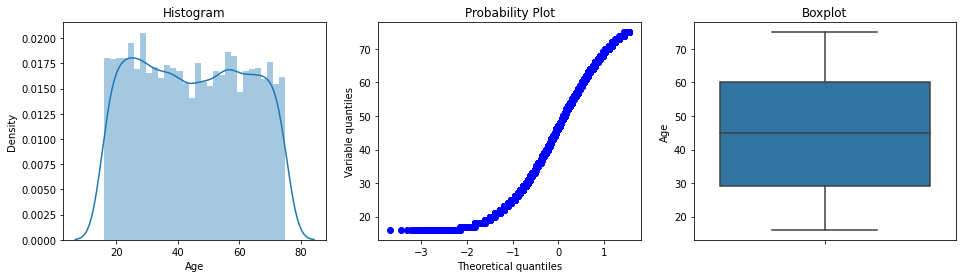

In [415]:
diagnostic_plots(X_train, 'Age')

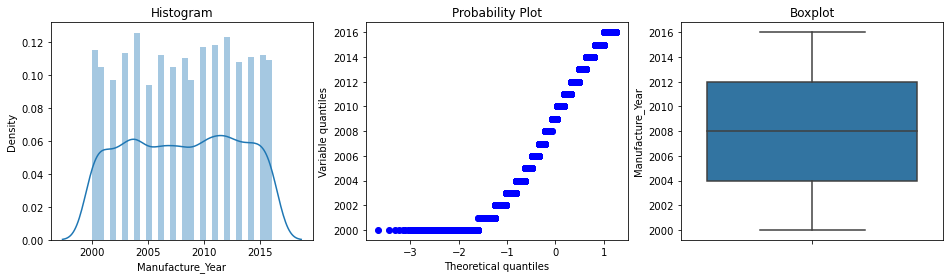

In [416]:
diagnostic_plots(X_train, 'Manufacture_Year')

In [417]:
X_train['Age'].mean()

44.920615054532455

In [418]:
def find_normal_boundaries(df, variable, distance):
# calculate the boundaries outside which sit the outliers
# for a Gaussian distribution
    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()
    return upper_boundary, lower_boundary

In [421]:
# find limits for RM
RM_upper_limit, RM_lower_limit = find_normal_boundaries(X_train, 'Age', 3)
RM_upper_limit, RM_lower_limit

(97.28627323096933, -7.445043121904412)

In [422]:
# Now let's replace the outliers by the maximum and minimum limit
temp_out = np.where(X_train['Age'] > RM_upper_limit, RM_upper_limit,np.where(X_train['Age'] < RM_lower_limit, RM_lower_limit,X_train['Age']))
temp_out

array([17., 60., 75., ..., 71., 50., 56.])

In [423]:
### -Capping-IQR-proximity-rule

In [424]:
def find_skewed_boundaries(df, variable, distance):
# Let's calculate the boundaries outside which sit the outliers
# for skewed distributions
# distance passed as an argument, gives us the option to
# estimate 1.5 times or 3 times the IQR to calculate
# the boundaries.
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)
    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)
    return upper_boundary, lower_boundary

In [425]:
# find limits for RM
RM_upper_limit, RM_lower_limit = find_skewed_boundaries(X_train, 'Age', 1.5)
RM_upper_limit, RM_lower_limit

(106.5, -17.5)

In [426]:
# Now let's replace the outliers by the maximum and minimum limit
temp_out_iqr = np.where(X_train['Age'] > RM_upper_limit, RM_upper_limit,np.where(X_train['Age'] < RM_lower_limit, RM_lower_limit,X_train['Age']))
temp_out_iqr

array([17., 60., 75., ..., 71., 50., 56.])

##  Feature Scaling:  